In [3]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv(r"C:\Users\user\Downloads\archive (7).zip")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [9]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [11]:
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby(['Store','YearMonth'])['Weekly_Sales'].sum().reset_index()
monthly_sales.rename(columns={'Weekly_Sales':'Monthly_Sales'}, inplace = True)
df = df.merge(monthly_sales, on=['Store','YearMonth'], how='left')
df.drop(columns=['YearMonth'], inplace = True)
print(df.head())

   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Monthly_Sales  
0  211.096358         8.106     6307344.10  
1  211.242170         8.106     6307344.10  
2  211.289143         8.106     6307344.10  
3  211.319643         8.106     6307344.10  
4  211.350143         8.106     5871293.98  


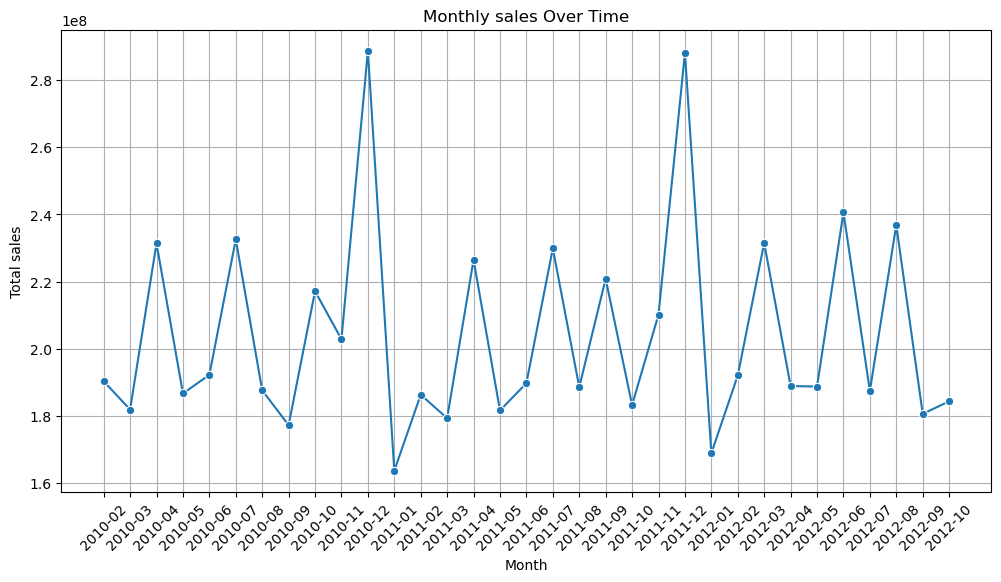

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['Weekly_Sales'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)
plt.figure(figsize=(12,6))
sns.lineplot(x='YearMonth',y='Weekly_Sales', data = monthly_sales, marker='o')
plt.title('Monthly sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

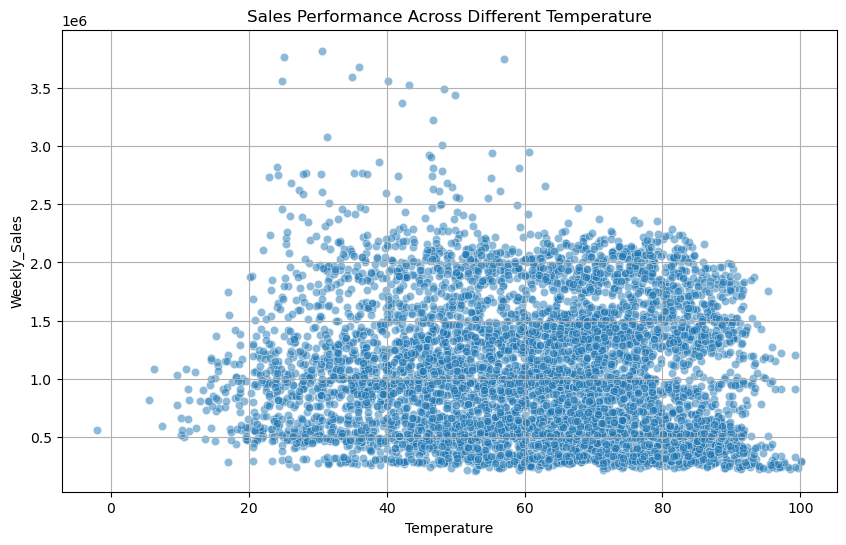

In [22]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data= df, alpha=0.5)
plt.title('Sales Performance Across Different Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')
plt.grid(True)
plt.show()

                      Store  Weekly_Sales  Holiday_Flag  Temperature  \
Store          1.000000e+00     -0.335332 -4.386841e-16    -0.022659   
Weekly_Sales  -3.353320e-01      1.000000  3.689097e-02    -0.063810   
Holiday_Flag  -4.386841e-16      0.036891  1.000000e+00    -0.155091   
Temperature   -2.265908e-02     -0.063810 -1.550913e-01     1.000000   
Fuel_Price     6.002295e-02      0.009464 -7.834652e-02     0.144982   
CPI           -2.094919e-01     -0.072634 -2.162091e-03     0.176888   
Unemployment   2.235313e-01     -0.106176  1.096028e-02     0.101158   
Monthly_Sales -3.300081e-01      0.952371  1.641531e-02    -0.044995   

               Fuel_Price       CPI  Unemployment  Monthly_Sales  
Store            0.060023 -0.209492      0.223531      -0.330008  
Weekly_Sales     0.009464 -0.072634     -0.106176       0.952371  
Holiday_Flag    -0.078347 -0.002162      0.010960       0.016415  
Temperature      0.144982  0.176888      0.101158      -0.044995  
Fuel_Price      

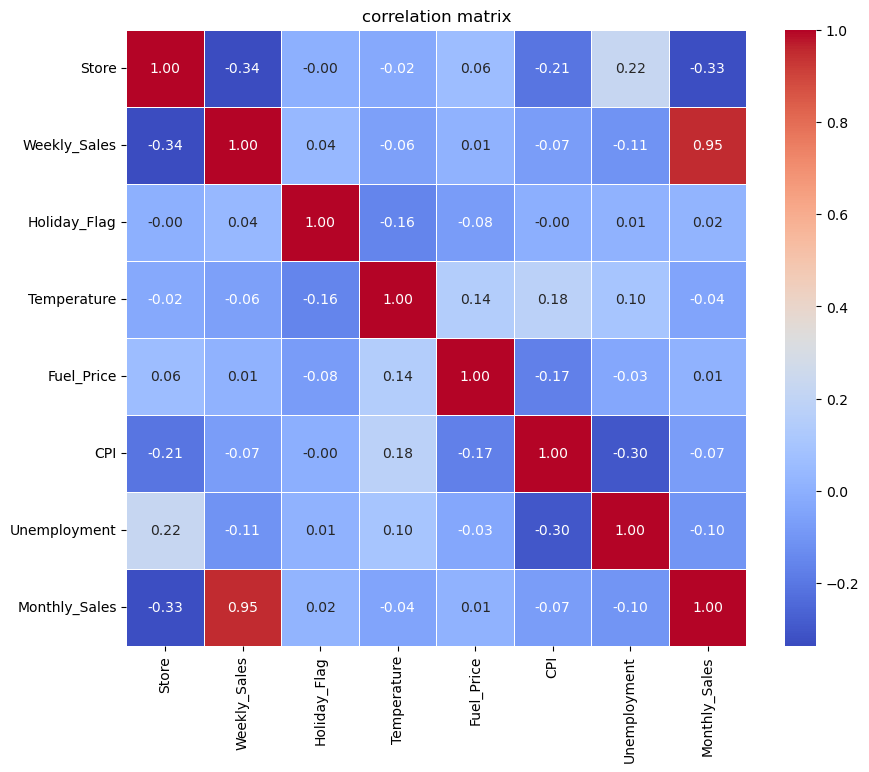

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include=['float64','int64'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('correlation matrix')
plt.show()

In [16]:
import pandas as pd
import statsmodels.api as sm
print('Columns in dataframe:',df.columns)
print('Missing values in Dataframe:')
print(df[['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']].isnull().sum())
print('Data types of the Columns:')
print(df[['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']].dtypes)
df[['Temperature','Fuel_Price','CPI','Unemployment']]
X = df[['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']] = df[['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales'])
y = df['Weekly_Sales']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summery())

Columns in dataframe: Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Monthly_Sales', 'YearMonth'],
      dtype='object')
Missing values in Dataframe:
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Weekly_Sales    0
dtype: int64
Data types of the Columns:
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Weekly_Sales    float64
dtype: object


AttributeError: 'OLSResults' object has no attribute 'summery'

In [35]:
pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached Cython-3.0.12-cp312-cp312-win_amd64.whl.metadata (3.6 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12.tar.gz (5.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached ephem-4.2-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\user\AppData\Local\Temp\pip-install-dxhm7clu\pystan_6ee67a7befac4513baa6187c3ac74a4a\setup.py", line 122, in <module>
      from Cython.Build.Inline import _get_build_extension
  ModuleNotFoundError: No module named 'Cython'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [36]:
from fbprophet import prophet
df_prophet = df[['Date','Weekly_Sales']]
df_prophet.columns = ['ds','y']
model = Prophet()
model.fit(df_prophet)
future = model.make_future_dataframe(periods=12, frec='M')
forecast = mpdel.predict(future)
model.plot(forecast)
plt.show

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
import pandas as pd
df.to_excel("output.xlsx",sheet_name="Processed Data",index=False, engine="openpyxl")
print("Excel file saved successfully")
